**HW 2**    
  
Friday 02/07/2025  
DS 3001 Spring 2025  
Teresa Duong  

In [69]:
import scipy.stats as scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Part 1: Data Exploration and Visualization 

1. Load the HW2.csv (can be found under Files on Canvas).

In [70]:
HW2 = pd.read_csv('HW2.csv')
display (HW2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


2. Calculate and report basic statistics for each variable (mean, median, standard deviation).

In [71]:
# For non-numeric columns I mapped yes or no data to 1 and 0 respectively while mapping furnishingstatus to 1, 0.5 and 0 for furnished, semi-furnished and unfurnished respectively.

for column in HW2.columns:
    # Mapping Yes or No to 1 or 0
    if column in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
        HW2[column] = HW2[column].map({'yes': 1, 'no': 0})
    # Mapping Furnishing Status to 1, 0.5, or 0
    elif column == "furnishingstatus":
        HW2[column] = HW2[column].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

display (HW2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [72]:
# Creating a dataframe of basic statistics for each column
stats = []
for column in HW2.columns:
    stats.append({
        'Column': column,
        'Mean': HW2[column].mean(),
        'Median': HW2[column].median(),
        'Standard Deviation': HW2[column].std()
    })

stats_df = pd.DataFrame(stats)
display(stats_df)

,Column,Mean,Median,Standard Deviation
0,price,4.766729e+06,4340000.0,1.870440e+06
1,area,5.150541e+03,4600.0,2.170141e+03
2,bedrooms,2.965138e+00,3.0,7.380639e-01
3,bathrooms,1.286239e+00,1.0,5.024696e-01
4,stories,1.805505e+00,2.0,8.674925e-01
5,mainroad,8.587156e-01,1.0,3.486347e-01
6,guestroom,1.779817e-01,0.0,3.828487e-01
7,basement,3.504587e-01,0.0,4.775519e-01
8,hotwaterheating,4.587156e-02,0.0,2.093987e-01
9,airconditioning,3.155963e-01,0.0,4.651799e-01


3. Create scatter plots for each independent variable against the house price.

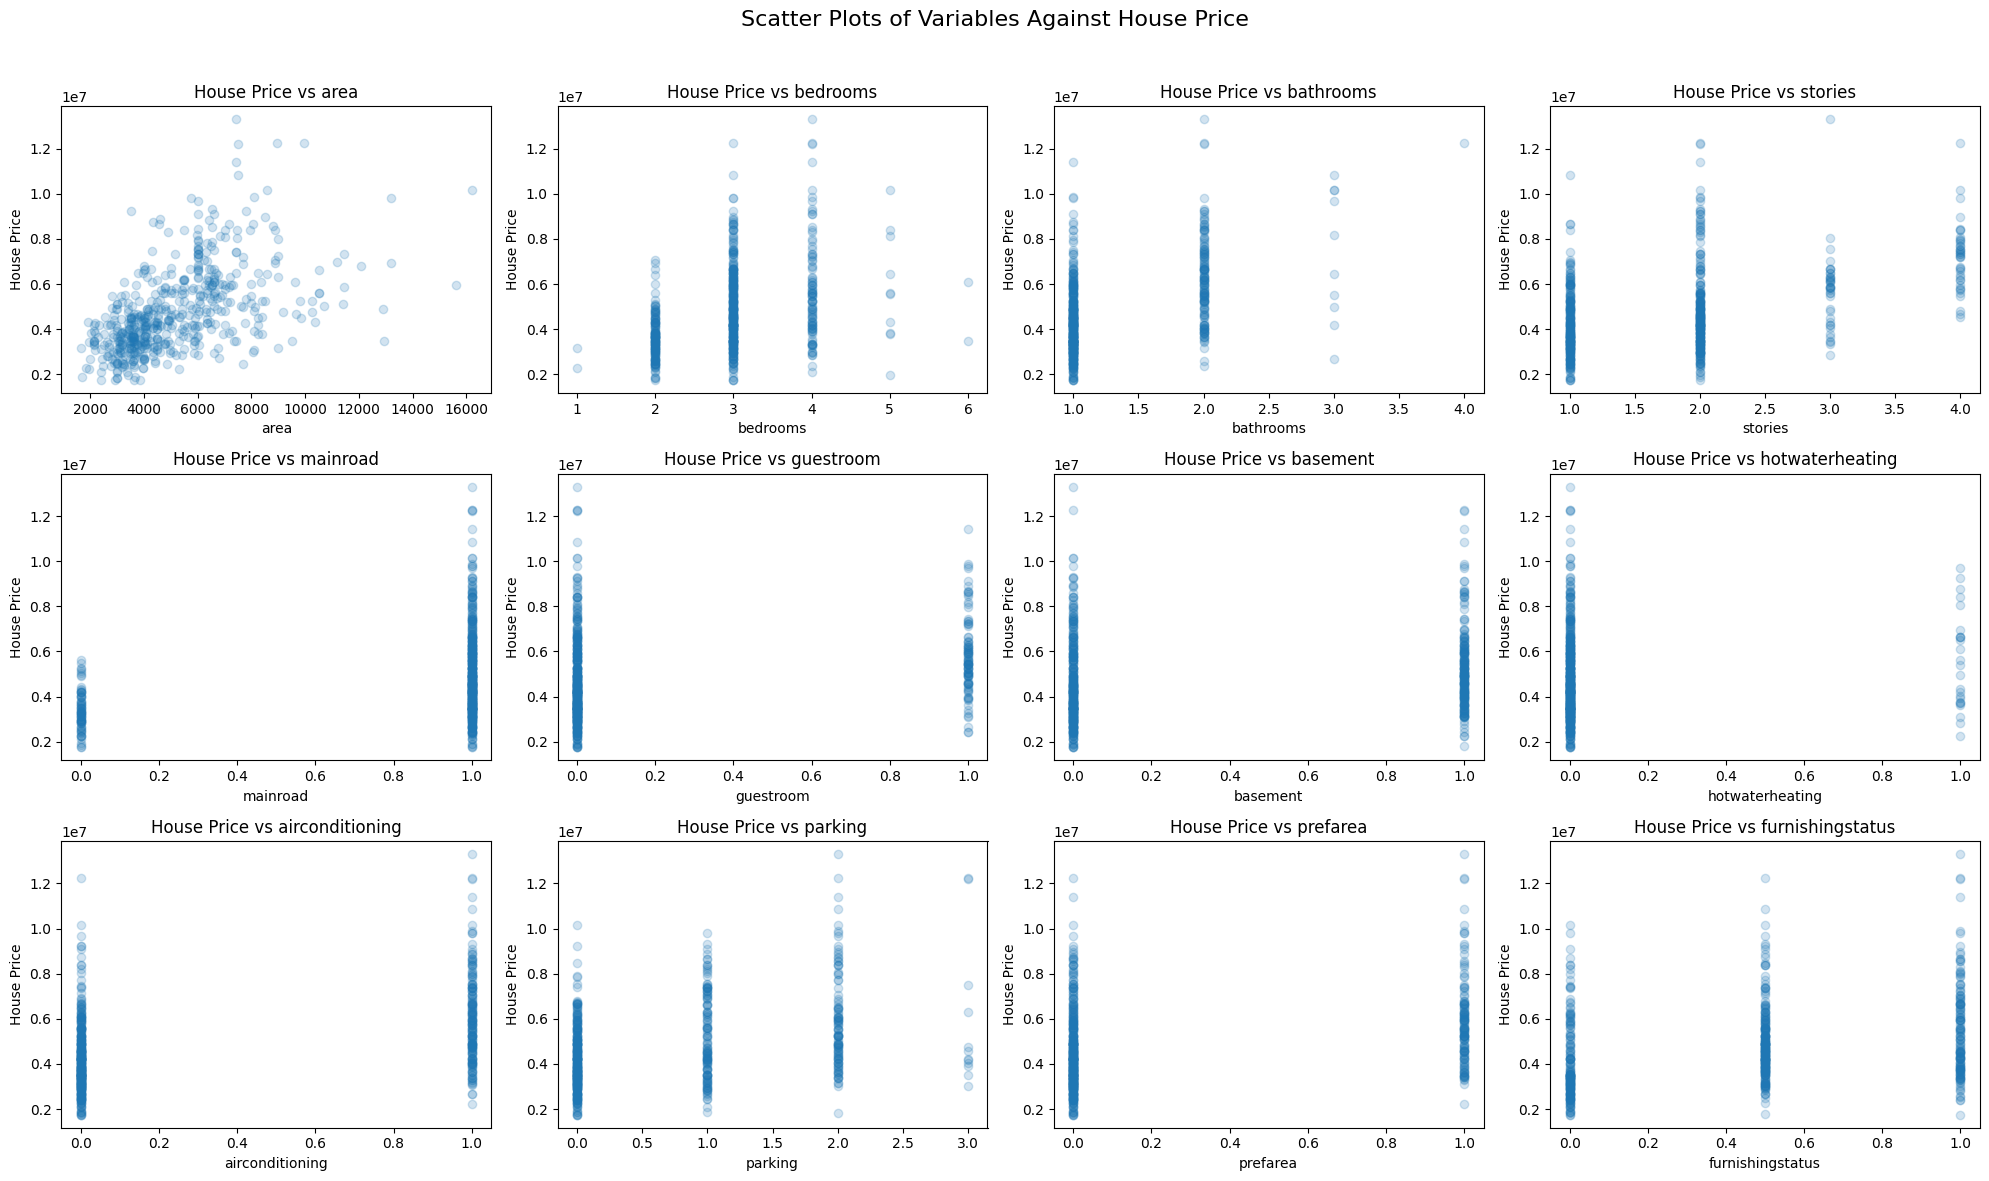

In [77]:
# There are 12 total subplots so I organized it in a 3x4 grid.
fig, axes = plt.subplots(3, 4, figsize=(20,12))
axes = axes.flatten()
fig.suptitle("Scatter Plots of Variables Against House Price", fontsize=16)

i = 0
for column in HW2.columns:
    if column == 'price':
        continue  # Skip the 'price' column
    else:
        ax = axes[i]
        ax.scatter(HW2[column], HW2['price'], alpha=0.2)
        ax.set_ylabel('House Price')
        ax.set_xlabel(column)
        ax.set_title(f"House Price vs {column}")
        i += 1

# Formatting so that the axes labels and titles don't overlap with each other
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()
plt.close()

4. Write a brief paragraph interpreting these plots.

<font color="blue">
These plots show that a lower value/quantity in the independent variables (e.g. area) tend to correspond to lower house prices. For example in the price vs. area plot, as house area increased, the price also increased. In the plots including mainroad, airconditioning, parking, prefarea, and furnishing status there is also a trend for higher x-axis values to be shifted higher in price. However, not all plots show this trend such as price vs. bedrooms, where the the houses with the most bedrooms, 5 or 6, seem to have lower prices than 2 or 3. 

These plots also show that there is a greater amount of lower priced houses than higher priced houses in this dataset since there is more density near the bottom of the plot than the top of the plot. 
</font>


Part 2: Correlation Analysis

1. Calculate the Pearson correlation coefficient between house price and each independent variable.

In [79]:
# Pearson correlation coefficient help: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

from scipy.stats import pearsonr
pearsons = []
for column in HW2.columns:
    if column == 'price':
        continue  # Skip the 'price' column
    else:
        coeff, _ = pearsonr(HW2['price'], HW2[column])
        pearsons.append({
            'Column of Comparison': column,
            'Pearson Correlation Coeficient': coeff,
    })

pearsons_df = pd.DataFrame(pearsons)
display(pearsons_df)


,Column of Comparison,Pearson Correlation Coeficient
0,area,0.535997
1,bedrooms,0.366494
2,bathrooms,0.517545
3,stories,0.420712
4,mainroad,0.296898
5,guestroom,0.255517
6,basement,0.187057
7,hotwaterheating,0.093073
8,airconditioning,0.452954
9,parking,0.384394


2. Interpret the correlation coefficients. Which variable has the strongest correlation with price? What does this mean?

<font color="blue">
The house area variable has a pearson correlation coefficient of ~0.53 with the house price, which indicates area has the strongest correlation with price. This means that house area and price change with each other the most whereas the changes in price with the other variables are less linked. 
</font>

Part 3: Linear Regression – 1 IV

1. Choose the independent variable with the strongest correlation to price.

2. Implement simple linear regression using the least squares method. 


In [84]:
area = HW2['area']
price = HW2['price']

# Lecture 4 Notes: 
# Least Squares Method = xdiff * ydiff from the means summed over all rows of area & price divided by xdiff*xdiff summed over all rows
def leastsquares (x,y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    xdiff = x - xmean
    ydiff = y - ymean
    m = np.sum(xdiff * ydiff) / np.sum(xdiff * xdiff)
    b = ymean - m * xmean
    return m, b

# For y = mx + b
m, b = leastsquares(price,area)
print(f'm = {m} and b = {b}')




m = 0.0006218804490087898 and b = 2186.2055595366696


3. Plot the regression line along with the scatter plot of your chosen variable vs. price.

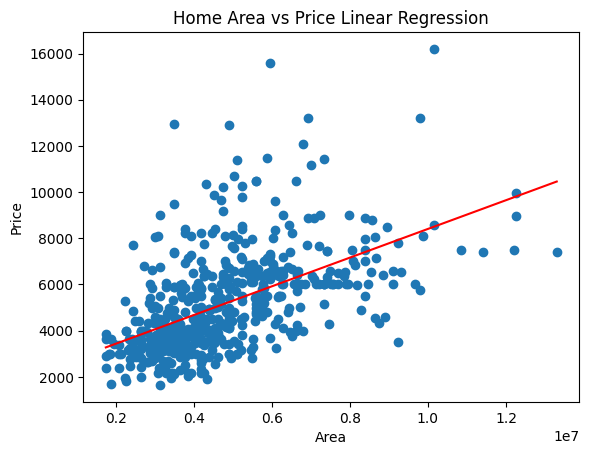

In [85]:
plt.title ("Home Area vs Price Linear Regression")
plt.scatter(price, area)
plt.plot(price, m*price + b, 'red', label = 'Linear Regression')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()
plt.close()

4. Calculate the R-squared value for your model.

In [82]:
# R-squared help: https://www.graphpad.com/guides/prism/latest/curve-fitting/r2_ameasureofgoodness_of_fitoflinearregression.htm
r2 = 1 - np.sum((price - (m*area + b))**2) / np.sum((price - np.mean(area))**2)
print(f"R-squared =  {r2}")

R-squared =  0.9048773348610479


5. Interpret the meaning of the slope and intercept in the context of house prices.


<font color='blue'>
Slope: For every 1 square foot increase in home area, the price increases by $0.0006218804490087898.

Intercept: The price of a hypothetically 0 square foot house is $2186.2055595366696.
</font>

Part 4: Residual Analysis 
1. Calculate the residuals for your simple linear regression model.

In [100]:
y_model = m*area + b
y_data = price
my_res=(y_model-y_data)

2. Create visualization of the residuals.

Text(0.5, 0, 'Area')

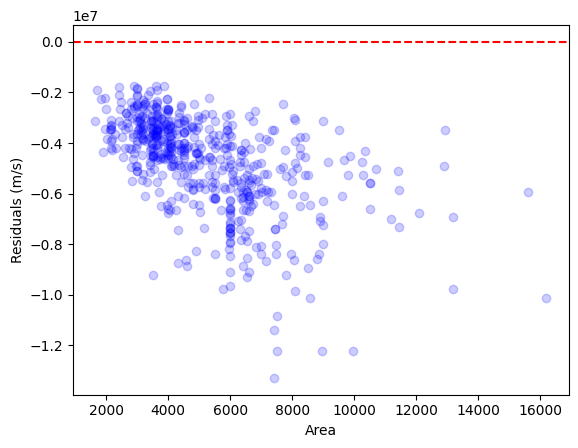

In [103]:
plt.scatter(area, my_res, color='blue', alpha=0.2)
plt.axhline(y=0, color='r', linestyle='--')  # y=0 line
plt.ylabel("Residuals (m/s)")
plt.xlabel("Area")


3. Interpret this visualization. What does it suggest about your model?


<font color='blue'>
The model tends to underestimate the price according to area since the residuals plotted here are negative. 
</font>

Part 5: Linear Regression – all IVs

1. Perform linear regression using all independent variables.

In [118]:
# Multiple Linear Regression
# y = B0(1) + B1X1 + B2X2 + B3X3 + B4X4 + B5X5 + B6X6 + B7X7 + B8X8 + B9X9 + B10X10 + B11X11
X = HW2[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
y = HW2['price']

def linregress_multivariable(X, y):
    # Adding a column of ones to X to satisfy the first intercept term, B0(1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Converting price values into numpy array
    y = y.values
    
    # Multiple Linear Regression Help: https://www.youtube.com/watch?v=DQ6xfe75CDk
    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, y)
    beta = np.dot(np.linalg.inv(XtX), XtY)
    return beta

# Calculating the coefficients B (beta) and intercept B0
beta = linregress_multivariable(X, y)
intercept = beta[0]
coefficients = beta[1:]
y_pred = np.dot(X, coefficients) + intercept

print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  -482107.8652417958
Coefficients =  [2.74215195e+02 1.44114341e+05 1.03266984e+06 4.27133682e+05
 5.04293180e+05 2.67539626e+05 3.62449189e+05 9.54215807e+05
 8.97701259e+05 6.39296684e+05 4.83288466e+05]


2. Compare the R-squared value of this model to your 1-IV linear regression model.


In [119]:
r2_1_IV = 1 - np.sum((price - (m*area + b))**2) / np.sum((price - np.mean(area))**2)
print(f"R-squared 1 IV: {r2}")

r2_all_IV = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f"R-squared All IVs: {r2}")

# The R-squared value for the multiple linear regression model seems to be the same as the R-squared value for the simple linear regression model

R-squared 1 IV: 0.9048773348610479
R-squared All IVs: 0.9048773348610479


3. Interpret the coefficients of the multiple regression model.

<font color='blue'>
When holding all other variables constant, increasing the independent variable (area, bedroom count, bathroom count, etc.) by 1 of their unit (square foot, count, etc.) increases the price by the ammount of the coefficient corresponding to the variable.
<font>

Part 6: Implement k-fold cross-validation (k=5) for your simple linear regression model. Explain how this helps in assessing the model's performance.

In [ ]:
# k-fold cross validation notes from lecture:
# Split data into 5 equal sized sets, treating fold i as the validation set and remaining folds as training set.
# Solve for coefficients on 4 sets (fit model on training set)
# Predict on the 5th set (validation set)
# Calculate the validation metric on the validation set.
# Average the 5 resulting validation metric values.

# KFold help: https://www.youtube.com/watch?v=nFyK7lhYrBY
from sklearn.model_selection import KFold
# Validation metric used: Mean Squared Error
from sklearn.metrics import mean_squared_error
import numpy as np

def k_fold_cross_val_score(X, y, k=5):
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    mse_score = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Solving for coefficients beta with the training set
        beta = linregress_multivariable(X_train, y_train)

        # Predicting with the validation set
        X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        y_pred = np.dot(X_test_with_intercept, beta)

        # Mean squared Error Validation Metric
        mse = mean_squared_error(y_test, y_pred)
        mse_score.append(mse)

    return np.mean(mse_score), np.std(mse_score)

# K-fold cross-validation
mean_mse, std_mse = k_fold_cross_val_score(X, y, k=5)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


Mean MSE: 1246550089337.9302
Standard Deviation of MSE: 241151329234.2058


We learned in class that using k-fold cross validation helps assess the model's performance by assessing how it responds to multiple different training sets (since they are different combinations of fractions of our dataset). This allows us to glimpse at how well it can generalize, and how it might perform to unseen data which is the ultimate goal of a model. 